In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx 
import pandas as pd
import random

In [9]:
G=nx.read_edgelist('../data/raw/ca-netscience.txt', nodetype=int)
pos=nx.spring_layout(G,iterations=30)

In [6]:
def localized_group(G,group_size=20):
    nodes=list(G.nodes())
    a=np.random.choice(nodes, size=1, replace=False)[0]
    neighbors=list(G[a])
    for node in neighbors:
        neighbors=neighbors+list(G[node])
    s=list(set(neighbors))
    if(len(s)>=group_size):
        group=list(np.random.choice(s, size=group_size, replace=False))
        return group
    else:
        return s
    
def activated_nodes(G,active, rate=0.12): # return list of activated nodes
    targets=[]
    for node in active:
        targets=targets+list(G[node]) # list of neighbors
           
    if (len(targets)>0):
        s=np.random.binomial(1, rate, len(targets))
        activated=list(np.array(targets)[np.nonzero(s)])
        if (len(activated)>0):
            return activated
        else: 
            return False
    else:
        return False
    
def spread(G, spreader, steps=100):
    active=spreader #initial spreader
    visited=[]
    t=0
    while(t<steps):
        t=t+1
        s=activated_nodes(G,active)
        active=[]
        if (s==False):
            t=steps
        else:
            for node in s:
                if (node not in visited):
                    active.append(node)
                    visited.append(node)
            if (len(active)==0):
                t=steps
    return (visited)

def fraction(list1,list2):
    return len(set(list1) & set(list2))/len(list1)

def spreading_ability(G, node, targets, num=2000):
    s=np.zeros(num)
    for i in range(num):
        s[i]=fraction(targets, (spread(G, [node])))
    return sum(s)/num

In [8]:
dt1=pd.read_csv('../data/raw/targets1.csv') 
targets=list(dt1['target'])

[288, 33, 232, 233, 268, 109, 21, 22, 23, 24, 220, 221, 287]


/home/kim/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


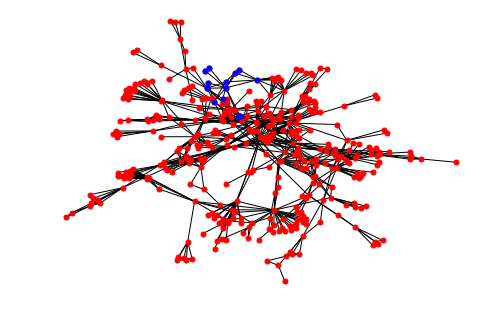

In [10]:
targets=localized_group(G,group_size=20)
print(targets)
nx.draw(G,pos,node_size=25,with_labels=False)
nx.draw_networkx_nodes(G,pos,
                       nodelist=targets,
                       node_color='b',node_size=25)

In [12]:
nodes=list(G.nodes())
s=[]
for node in nodes:
    a = spreading_ability(G,node, targets)
    s.append(a)

In [13]:
df1 = pd.DataFrame(columns=['target'])
df1['target']=targets
df1.to_csv('../data/raw/targets5.csv',index=False)

df2 = pd.DataFrame(columns=['node', 'spreading ability'])
df2['node']=list(np.array(nodes)[np.nonzero(s)])
df2['spreading ability']=list(np.array(s)[np.nonzero(s)])
df2.to_csv('../data/raw/spreading5.csv',index=False)